# Visualization of fMRI Data from Neurosynth

Kalantzi Maria

**Date:** 13 December 2025

## Project Overview
This project visualizes functional MRI (fMRI) meta-analysis data from the
Neurosynth (https://neurosynth.org) platform. The selected cognitive concept
for this analysis is **chronic pain**. A statistical brain map (uniformity test)
is overlaid on an anatomical MRI scan to identify brain regions that are
strongly associated with this concept.

## Data Source
- **Neurosynth Meta-Analysis (Chronic Pain):**  
https://neurosynth.org/analyses/terms/chronic%20pain

## Loading MRI Data

In this section, the anatomical and functional MRI files are automatically
identified and loaded from the working directory. This avoids hardcoding file
paths and ensures the notebook remains portable and reproducible.

In [16]:
import nibabel as nib
import os

data_dir = os.getcwd()

#List all files in the current folder

files = os.listdir(data_dir)

#Automatically find anatomical and stat map
anat_file = [f for f in files if "anatomical" in f and f.endswith(".nii.gz")][0]
stat_file = [f for f in files if "uniformity" in f and f.endswith(".nii.gz")][0]

#Load the images
anat_img = nib.load(anat_file)
stat_img = nib.load(stat_file)


anat_file, stat_file, anat_img, stat_img

('anatomical.nii.gz',
 'chronic pain_uniformity-test_z_FDR_0.01.nii.gz',
 <nibabel.nifti1.Nifti1Image at 0x2472280bd70>)

## Visualization of Functional Brain Activation

Here, the functional statistical map from Neurosynth is visualized on top of
the anatomical MRI scan using Nilearn's 'plot_stat_map' function. Visualization
parameters such as threshold, colormap, and cut coordinates are chosen to
highlight regions with strong associations to chronic pain.

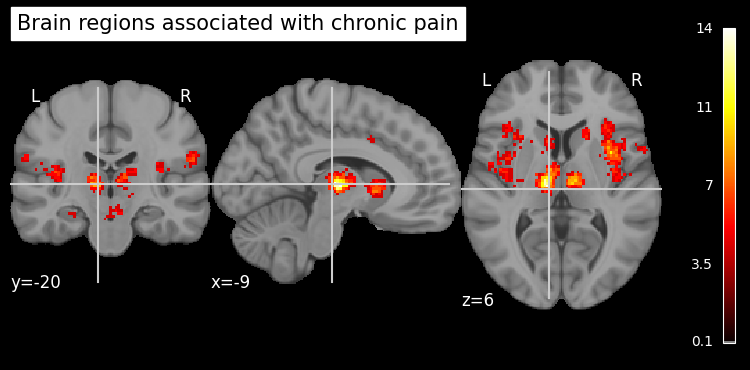

In [17]:
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt

#Check image resolution and spatial orientation

anat_img.header.get_zooms(), anat_img.affine

from nilearn import datasets

#Load standard MNI152 anatomical template for visualization

anat_full = datasets.load_mni152_template()

#Visualize functional data over anatomical scan

plot_stat_map(
    stat_img, 
    bg_img=anat_full,
    display_mode="ortho",
    cut_coords=[-9, -20, 6],
    cmap="hot",
    title="Brain regions associated with chronic pain",
    threshold=0.1
)
plt.show()


#x=saggital
#y=coronal
#z=axial


## Distribution of Functional Activation Values

This section examines the distribution of positive Z-values from the functional
statistical map. A histogram is used to summarize the strength and frequency of
brain activations associated with the selected cognitive concept.


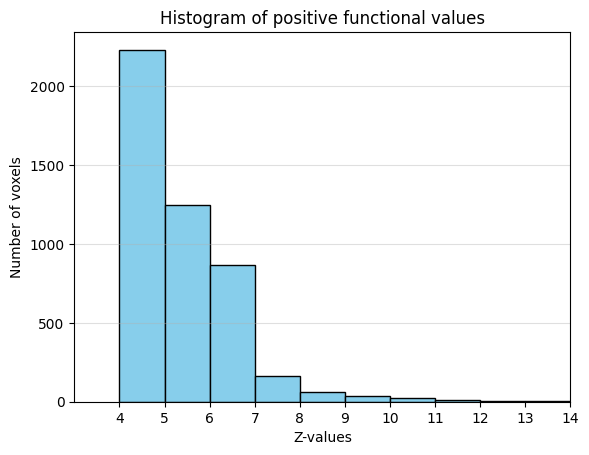

np.float64(4.240925547938521)

In [18]:
import numpy as np

#This histogram shows the distribution of positive Z-values,
#reflecting the strength of association between brain regions
#and chronic pain.

#load  data from the stat map as array
data = stat_img.get_fdata()

#take only the positive values
positive_values = data[data > 0]



plt.hist(
    positive_values, 
    bins=np.arange(4, 15, 1), 
    color="skyblue",
    edgecolor="black"
    )
plt.xlim(3, 14)
plt.xticks(range(4, 15, 1))
plt.grid(axis='y', alpha=0.4)



plt.title("Histogram of positive functional values")
plt.xlabel("Z-values")
plt.ylabel("Number of voxels")

plt.show()

positive_values.min()

#The map contains only statistically significant activations, so all voxels with Z < 4 have been removed during preprocessing.
